In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import pickle

In [2]:
dataframe = pd.read_csv(rf'..\data\Մարդաչափական տվյալների հարցում.csv')
dataframe.head()

date_created   date_modified      ip_address  Ձեր սեռը  \
0             NaN             NaN             NaN  Response   
1  2/8/2022 10:30  2/8/2022 10:33     91.196.36.8    Իգական   
2   2/8/2022 8:29   2/8/2022 8:30   217.76.10.130    Իգական   
3   2/8/2022 1:30   2/8/2022 1:31   87.241.184.71    Իգական   
4   2/8/2022 0:08   2/8/2022 0:09  185.215.55.203    Իգական   

            Ձեր տարիքը      Ձեր հասակը (սմ)             Ձեր քաշը  \
0  Open-Ended Response  Open-Ended Response  Open-Ended Response   
1                   16                  165                   55   
2                   16                  154                   42   
3                   17                  167                   56   
4                   18                  165                   70   

      Ձեր կոշիկի չափսը Ձեր տաբատի չափսը Ձեր վերնազգեստի (майка) չափսը  
0  Open-Ended Response         Response                      Response  
1                   38        M (38-39)                             M  
2                   35       XS (34-35)                            XS  
3                   38        M (38-39)                             M  
4                   40        L (40-41)                             M

In [3]:
data = dataframe[['Ձեր սեռը', 
                  'Ձեր տարիքը', 
                  'Ձեր հասակը (սմ)', 
                  'Ձեր քաշը', 
                  'Ձեր կոշիկի չափսը']]
data.head()

Ձեր սեռը           Ձեր տարիքը      Ձեր հասակը (սմ)             Ձեր քաշը  \
0  Response  Open-Ended Response  Open-Ended Response  Open-Ended Response   
1    Իգական                   16                  165                   55   
2    Իգական                   16                  154                   42   
3    Իգական                   17                  167                   56   
4    Իգական                   18                  165                   70   

      Ձեր կոշիկի չափսը  
0  Open-Ended Response  
1                   38  
2                   35  
3                   38  
4                   40

In [4]:
data.columns = ['sex', 'age', 'height', 'weight', 'shoe_size']

In [5]:
data = data.drop(0)
data.head()

sex age height weight shoe_size
1  Իգական  16    165     55        38
2  Իգական  16    154     42        35
3  Իգական  17    167     56        38
4  Իգական  18    165     70        40
5  Արական  16    183     72        46

In [6]:
data.shape

(306, 5)

In [7]:
data.dropna(inplace=True)
data.head()

sex age height weight shoe_size
1  Իգական  16    165     55        38
2  Իգական  16    154     42        35
3  Իգական  17    167     56        38
4  Իգական  18    165     70        40
5  Արական  16    183     72        46

In [8]:
data.drop_duplicates(inplace=True)
data.head()

sex age height weight shoe_size
1  Իգական  16    165     55        38
2  Իգական  16    154     42        35
3  Իգական  17    167     56        38
4  Իգական  18    165     70        40
5  Արական  16    183     72        46

In [9]:
data.shape

(290, 5)

In [10]:
data[['age', 'height', 'weight', 'shoe_size']] = data[['age', 'height', 'weight', 'shoe_size']].astype(float)
data.head()

sex   age  height  weight  shoe_size
1  Իգական  16.0   165.0    55.0       38.0
2  Իգական  16.0   154.0    42.0       35.0
3  Իգական  17.0   167.0    56.0       38.0
4  Իգական  18.0   165.0    70.0       40.0
5  Արական  16.0   183.0    72.0       46.0

<AxesSubplot:xlabel='height', ylabel='weight'>

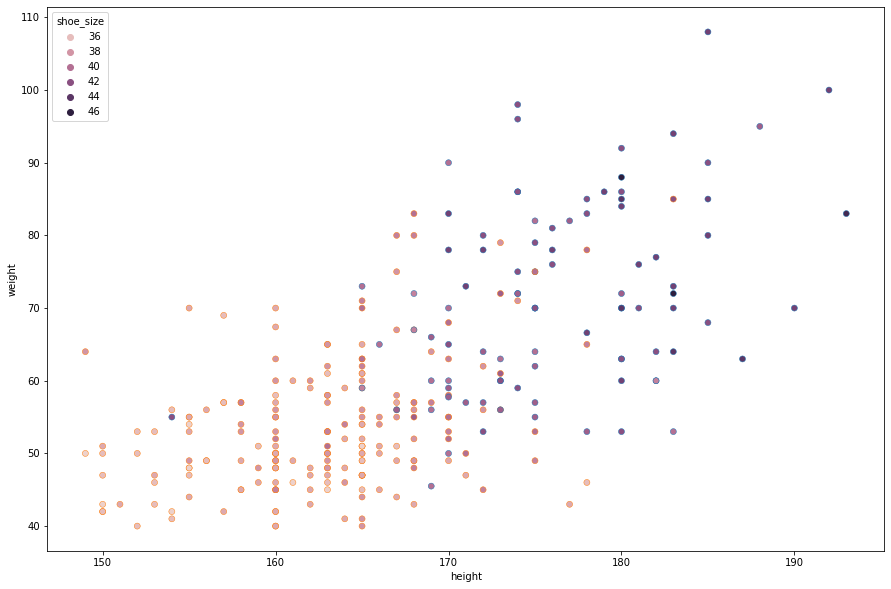

In [11]:
palette = {"Արական": "C0", "Իգական": "C1"}
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(data=data, x='height', y='weight', hue='shoe_size', edgecolor=data["sex"].map(palette))

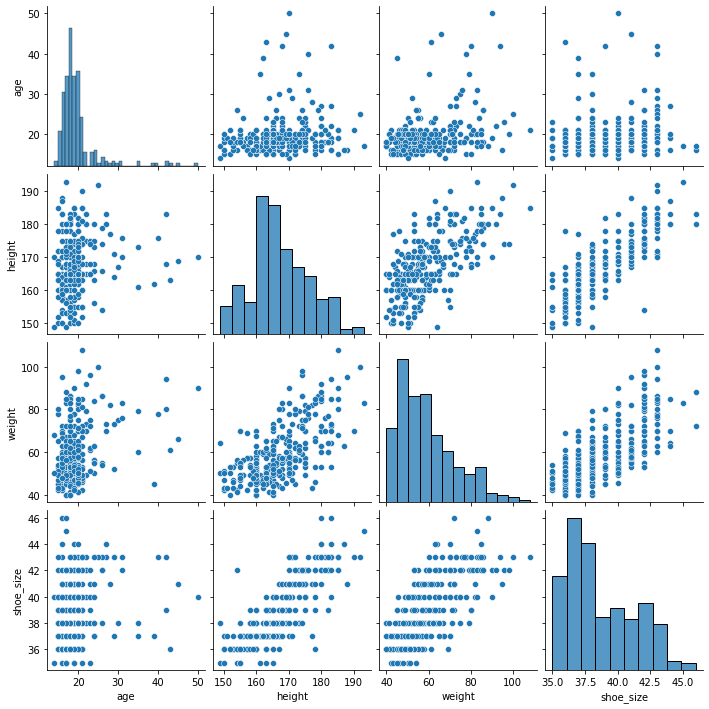

In [12]:
sns.pairplot(data)

In [13]:
X = data[['sex', 'age', 'height', 'weight']]
y = data['shoe_size']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [17]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', LogisticRegression())])

In [18]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [19]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

In [20]:
grid_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('label_encoding',
                                                                         OneHotEncoder(),
                                                                         ['sex']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'height',
                                                                          'weight'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 

In [21]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.058133      0.013042         0.003715        0.000662   
5       0.056878      0.003760         0.003876        0.000304   
6       0.061917      0.010772         0.003667        0.001189   
7       0.063933      0.007572         0.003605        0.000911   
8       0.072886      0.013684         0.004005        0.001006   

  param_model__C param_model__max_iter  \
4              5                   700   
5              6                   700   
6              7                   700   
7              8                   700   
8              9                   700   

                                    params  split0_test_score  \
4  {'model__C': 5, 'model__max_iter': 700}           0.291667   
5  {'model__C': 6, 'model__max_iter': 700}           0.291667   
6  {'model__C': 7, 'model__max_iter': 700}           0.291667   
7  {'model__C': 8, 'model__max_iter': 700}           0.291667   
8  {'model__C': 9, 'model__max_iter': 700}           0.291667   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4               0.25           0.565217           0.304348           0.434783   
5               0.25           0.521739           0.304348           0.434783   
6               0.25           0.478261           0.304348           0.434783   
7               0.25           0.478261           0.304348           0.434783   
8               0.25           0.478261           0.304348           0.434783   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
4           0.565217           0.347826           0.391304           0.434783   
5           0.565217           0.347826           0.434783           0.434783   
6           0.608696           0.347826           0.434783           0.434783   
7           0.608696           0.347826           0.434783           0.434783   
8           0.608696           0.347826           0.434783           0.434783   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
4           0.347826         0.393297        0.102698                1  
5           0.347826         0.393297        0.097019                1  
6           0.347826         0.393297        0.100841                1  
7           0.347826         0.393297        0.100841                1  
8           0.347826         0.393297        0.100841                1

In [22]:
best_log_reg = grid_search.best_estimator_

In [23]:
best_log_reg.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', LogisticRegression(C=5, max_iter=700))])

In [24]:
y_pred = best_log_reg.predict(X_test)
y_pred

array([36., 37., 38., 41., 40., 42., 37., 43., 36., 37., 41., 37., 38.,
       37., 37., 38., 37., 38., 37., 37., 37., 37., 36., 43., 38., 37.,
       42., 42., 38., 42., 38., 37., 38., 43., 37., 38., 38., 38., 36.,
       37., 37., 36., 38., 38., 36., 38., 38., 37., 38., 38., 37., 38.,
       38., 42., 41., 36., 42., 43.])

In [25]:
y_test.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [26]:
accuracy_score(y_test, y_pred)

0.4827586206896552

In [27]:
x_axis = list(y_test.unique())
x_axis

[36.0, 38.0, 39.0, 41.0, 43.0, 37.0, 44.0, 40.0, 46.0, 42.0]

In [28]:
x_axis.sort()
x_axis

[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 46.0]

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

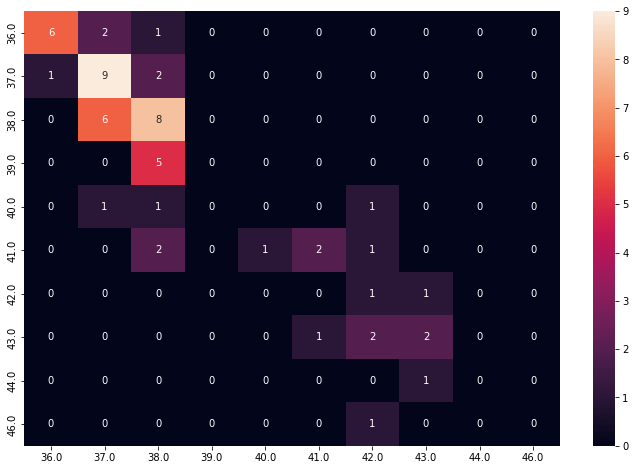

In [29]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [30]:
best_log_reg.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', LogisticRegression(C=5, max_iter=700))])

In [31]:
with open('..\models\shoe_size_pred_models\logistic_regression.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

Without Age Feature

In [32]:
data_without_age = data.drop(['age'], axis=1)
data_without_age.head()

sex  height  weight  shoe_size
1  Իգական   165.0    55.0       38.0
2  Իգական   154.0    42.0       35.0
3  Իգական   167.0    56.0       38.0
4  Իգական   165.0    70.0       40.0
5  Արական   183.0    72.0       46.0

In [33]:
X_wa = data_without_age[['sex', 'height', 'weight']]
y_wa = data_without_age['shoe_size']

In [34]:
X_train_wa, X_test_wa, y_train_wa, y_test_wa = train_test_split(X_wa, y_wa, train_size=0.8, random_state=42)

In [35]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [36]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', LogisticRegression(C=4, max_iter=200))])

In [37]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [38]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

In [39]:
grid_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('label_encoding',
                                                                         OneHotEncoder(),
                                                                         ['sex']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['height',
                                                                          'weight'])])),
                                       ('model',
                                        LogisticRegression(C=4,
                                                           max_iter=200))]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                    

In [40]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.058395      0.011416         0.004948        0.001142   
3        0.058408      0.012386         0.003986        0.000896   
1        0.043054      0.002069         0.004002        0.000648   
18       0.086175      0.016967         0.004054        0.000759   
17       0.096837      0.028007         0.004172        0.001060   

   param_model__C param_model__max_iter  \
2               3                   700   
3               4                   700   
1               2                   700   
18             19                   700   
17             18                   700   

                                      params  split0_test_score  \
2    {'model__C': 3, 'model__max_iter': 700}           0.416667   
3    {'model__C': 4, 'model__max_iter': 700}           0.416667   
1    {'model__C': 2, 'model__max_iter': 700}           0.416667   
18  {'model__C': 19, 'model__max_iter': 700}           0.416667   
17  {'model__C': 18, 'model__max_iter': 700}           0.416667   

    split1_test_score  split2_test_score  split3_test_score  \
2            0.250000           0.565217           0.391304   
3            0.250000           0.565217           0.347826   
1            0.291667           0.565217           0.347826   
18           0.250000           0.521739           0.347826   
17           0.250000           0.521739           0.347826   

    split4_test_score  split5_test_score  split6_test_score  \
2            0.478261           0.565217           0.347826   
3            0.478261           0.565217           0.347826   
1            0.478261           0.565217           0.347826   
18           0.434783           0.521739           0.347826   
17           0.434783           0.521739           0.347826   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
2            0.347826           0.521739           0.347826         0.423188   
3            0.347826           0.521739           0.347826         0.418841   
1            0.347826           0.521739           0.304348         0.418659   
18           0.434783           0.521739           0.347826         0.414493   
17           0.434783           0.521739           0.347826         0.414493   

    std_test_score  rank_test_score  
2         0.100589                1  
3         0.102789                2  
1         0.100691                3  
18        0.087020                4  
17        0.087020                4

In [41]:
best_log_reg_without_age_feature = grid_search.best_estimator_

In [42]:
best_log_reg_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', LogisticRegression(C=3, max_iter=700))])

In [43]:
y_pred = best_log_reg_without_age_feature.predict(X_test_wa)
y_pred

array([36., 37., 38., 41., 41., 42., 37., 42., 36., 37., 41., 37., 38.,
       37., 37., 38., 37., 38., 38., 37., 37., 37., 36., 43., 38., 37.,
       42., 42., 38., 42., 38., 37., 38., 42., 37., 38., 38., 38., 36.,
       37., 37., 36., 38., 38., 37., 38., 38., 37., 38., 38., 37., 38.,
       38., 42., 41., 36., 42., 43.])

In [44]:
y_test_wa.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [45]:
accuracy_score(y_test_wa, y_pred)

0.46551724137931033

In [46]:
x_axis = list(y_test_wa.unique())
x_axis.sort()
x_axis

[36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 46.0]

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

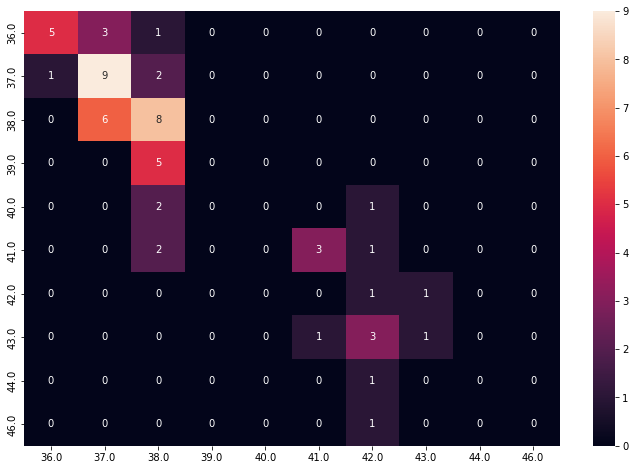

In [47]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [48]:
best_log_reg_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', LogisticRegression(C=3, max_iter=700))])

In [49]:
with open('..\models\shoe_size_pred_models\logistic_regression_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_log_reg_without_age_feature, f)

Logistic Regression without age feature shows better results than with the feature. 
<br>
With Age Feature = 40.7% accuracy score, std = 8% 
<br>
Without Age Feature = 44.2% accuracy score, std = 11%

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
X_train_viz = X_train.copy()
label_encoder = LabelEncoder()
X_train_viz['sex'] = label_encoder.fit_transform(X_train['sex'])

In [52]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_viz, y_train)

DecisionTreeClassifier(max_depth=3)

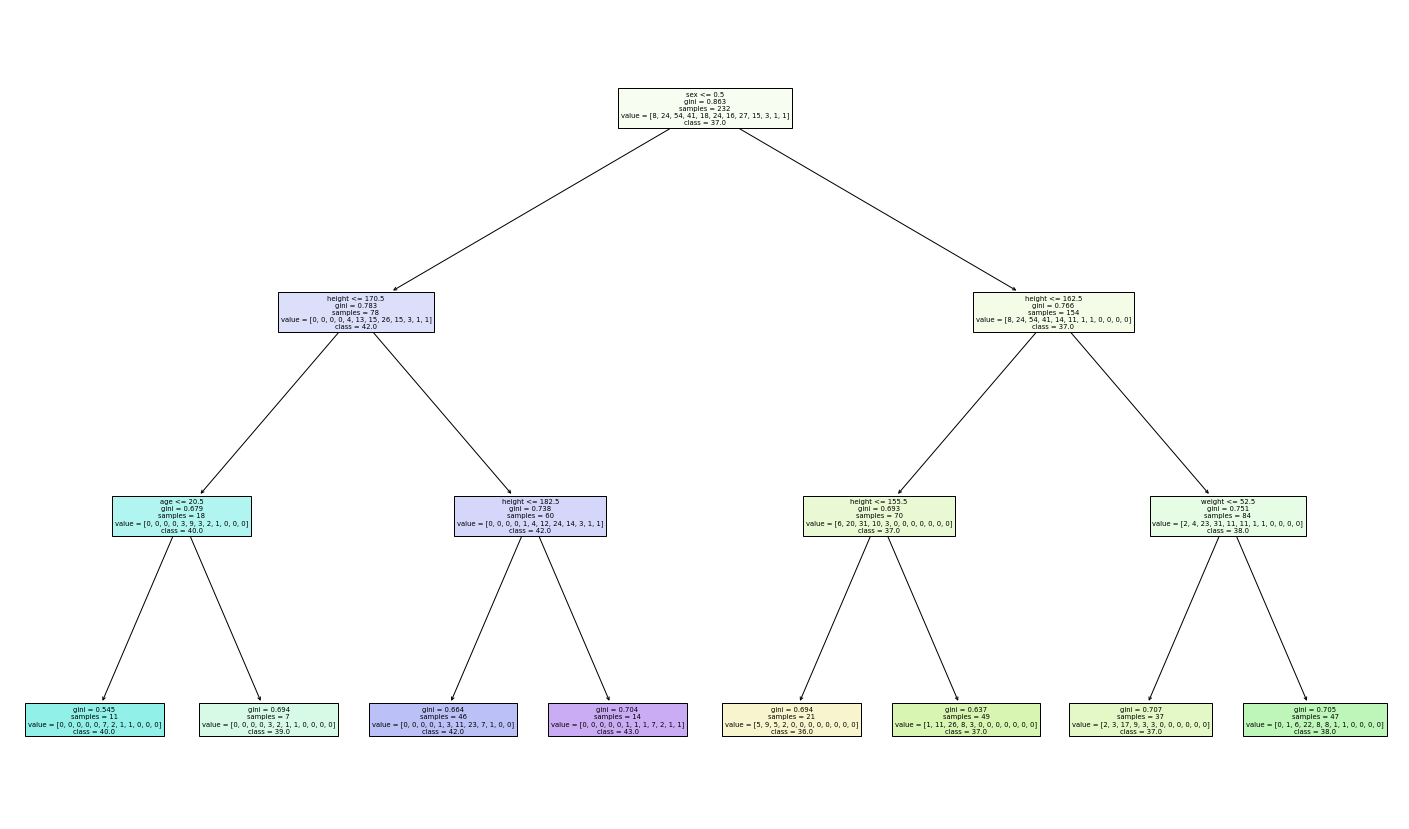

In [53]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[str(i) for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\shoe_size_tree_max_depth_3.pdf', format='pdf', bbox_inches = "tight")

In [54]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [55]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight']),])

In [56]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', DecisionTreeClassifier())])

In [57]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [58]:
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, m

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.348 t

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=20;, sc

[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min_samples_split=22;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min_samples_split=22;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=20, model__min

[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.

[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=2

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=24;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=24;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=21;, scor

[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=

[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=18;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=18;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=21, model__min_sample

[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=33;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=33;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=3, model__min_samples_split=4

[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.

[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=30;, score=0.3

[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=14;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=14;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=14;, score=0.

[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=12;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=12;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.500 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.417 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_

[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_sp

[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.348 tota

[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.652 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=6;, score=

[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=20;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=20;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=20;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=

[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=2;, score=0

[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=30;, sc

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.217 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.261 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.130 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.304 total time

[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.435 tot

[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_sp

[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=

[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=34;, score=0.

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=13;, score=0.5

[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.609 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=

[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.696 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=7;, sc

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples

[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_sampl

[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.348 tot

[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=28;, score=0.458 to

[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=13;, score=0.174 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=

[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=21;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=21;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=21;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.348 total 

[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=24;, score=0.500 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=24;, score=0

[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=38;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=5, model__min_samples

[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split

[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.2

[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=33;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=33;, score=0.417 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=33;, score=0.391 

[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=8;, sc

[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.435 total time=

[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.417 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=22;, scor

[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=17;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=17;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=1

[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.217 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.

[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.304 tot

[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=23, model__min_samples_spli

[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_sample

[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.

[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=18;, score=0.417

[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_sample

[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=2;, score=0.292 tota

[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, sc

[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=18;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=18;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=18;, sco

[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=39;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=39;, score=0.458 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=39;, sco

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=15;, sc

[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=31;, score

[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.522 total time=

[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.609 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_sample

[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=11, model__min_samples

[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=34;, score=0.3

[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.5

[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=15;, score=0.478 tota

[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=30;, score=0.4

[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.304 tot

[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_spli

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=20;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_

[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_sample

[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.478 tota

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=13, model__min_samples_split=3

[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.292 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.333

[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=28;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=28;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=28;, score=0.217 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=36;, score

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.

[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.304 tot

[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split

[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=30;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_sample

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.348 tota

[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=

[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=18;, score=0.304 tota

[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=18;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=18;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=18

[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples

[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=24;, score=0.391 total time=   0.0s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
  

In [59]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
499       0.008018      0.000611         0.003780        0.000395   
307       0.008325      0.000735         0.004463        0.000857   
355       0.007777      0.000438         0.004065        0.000336   
283       0.007919      0.000586         0.003766        0.000397   
232       0.007885      0.000261         0.004263        0.000404   

    param_model__min_samples_split param_model__min_samples_leaf  \
499                             24                            12   
307                             19                            12   
355                             21                            12   
283                              2                            12   
232                             13                            12   

    param_model__max_depth param_model__criterion  \
499                     11                entropy   
307                     10                entropy   
355                      8                entropy   
283                      9                entropy   
232                      5                entropy   

                                                params  split0_test_score  \
499  {'model__min_samples_split': 24, 'model__min_s...                0.5   
307  {'model__min_samples_split': 19, 'model__min_s...                0.5   
355  {'model__min_samples_split': 21, 'model__min_s...                0.5   
283  {'model__min_samples_split': 2, 'model__min_sa...                0.5   
232  {'model__min_samples_split': 13, 'model__min_s...                0.5   

     ...  split3_test_score  split4_test_score  split5_test_score  \
499  ...           0.391304           0.565217           0.608696   
307  ...           0.391304           0.565217           0.608696   
355  ...           0.391304           0.565217           0.608696   
283  ...           0.391304           0.565217           0.608696   
232  ...           0.391304           0.565217           0.608696   

     split6_test_score  split7_test_score  split8_test_score  \
499           0.347826           0.304348           0.521739   
307           0.347826           0.304348           0.521739   
355           0.347826           0.304348           0.521739   
283           0.347826           0.304348           0.521739   
232           0.347826           0.304348           0.521739   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
499           0.391304         0.452536        0.093003                1  
307           0.391304         0.452536        0.093003                1  
355           0.391304         0.452536        0.093003                1  
283           0.391304         0.452536        0.093003                1  
232           0.391304         0.452536        0.093003                1  

[5 rows x 22 columns]

In [60]:
best_tree = rand_search.best_estimator_

In [61]:
best_tree.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=12,
                                        min_samples_split=3))])

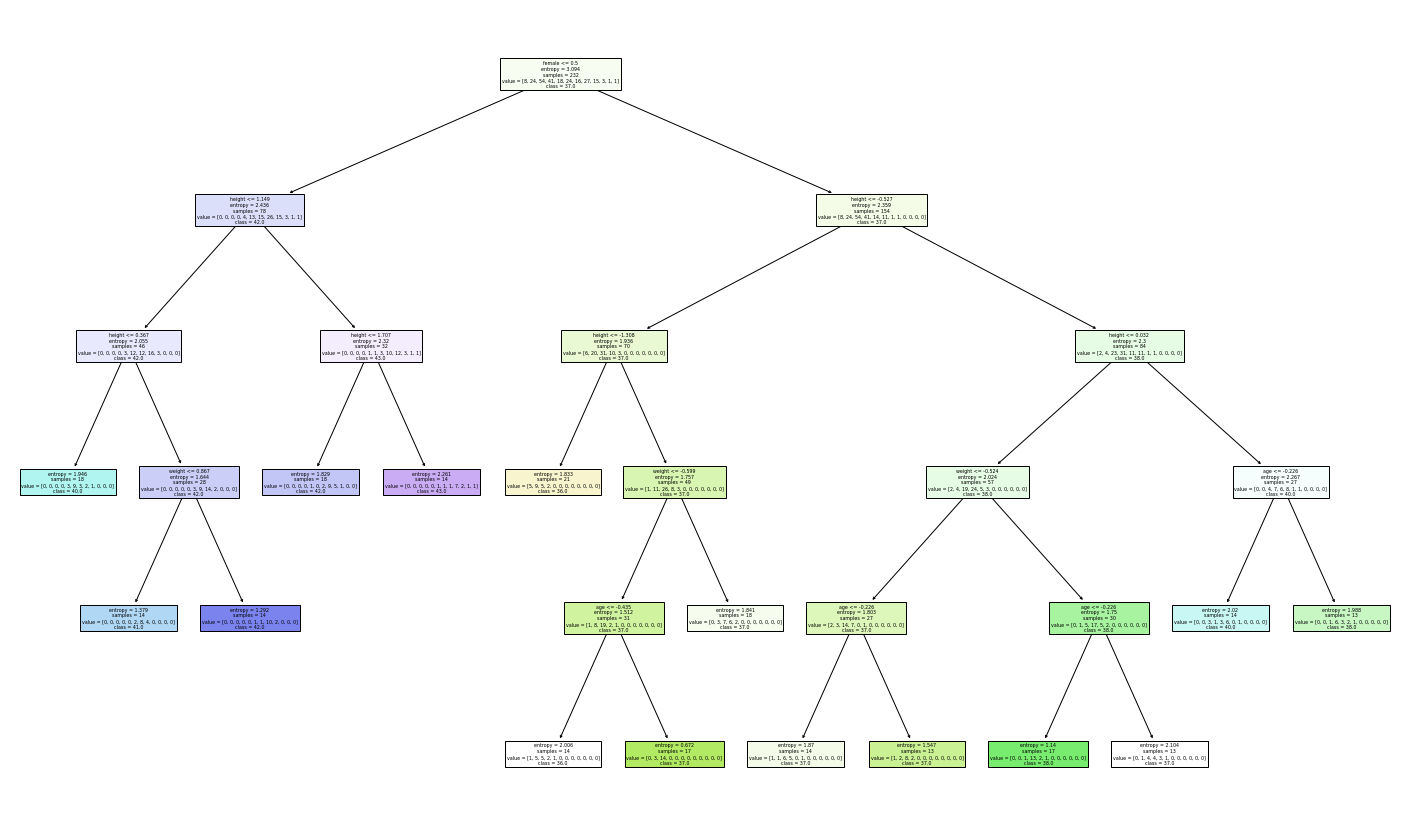

In [62]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree.named_steps.model, 
          filled=True, 
          class_names=[str(i) for i in best_tree.named_steps.model.classes_],
          feature_names=['male', 'female', 'age', 'height', 'weight'])
plt.savefig(r'..\plots\shoe_size_best_tree.pdf', format='pdf', bbox_inches = "tight")

In [63]:
y_pred = best_tree.predict(X_test)
y_pred

array([36., 37., 38., 41., 40., 42., 40., 42., 36., 37., 42., 37., 38.,
       37., 36., 38., 37., 40., 38., 37., 37., 36., 36., 43., 37., 37.,
       42., 40., 40., 42., 40., 37., 38., 42., 37., 37., 38., 37., 36.,
       37., 37., 36., 40., 38., 36., 38., 38., 36., 38., 38., 37., 36.,
       38., 42., 41., 36., 42., 43.])

In [64]:
y_test.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [65]:
accuracy_score(y_test, y_pred)

0.3448275862068966

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

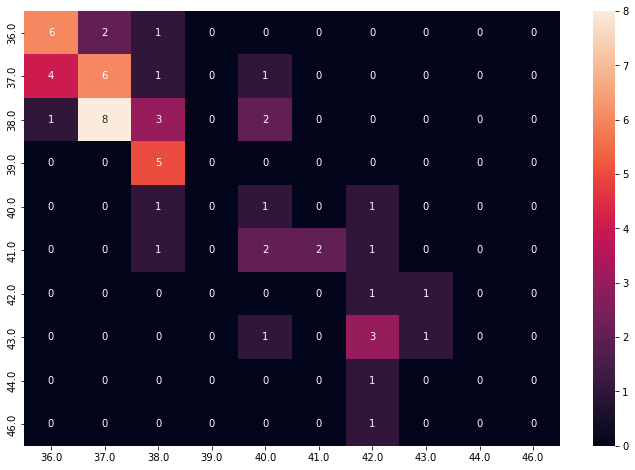

In [66]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [67]:
best_tree.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=12,
                                        min_samples_split=3))])

In [68]:
with open('..\models\shoe_size_pred_models\decision_tree_classifier.pkl', 'wb') as f:
    pickle.dump(best_tree, f)

Without Age feature

In [69]:
X_train_viz = X_train_wa.copy()
label_encoder = LabelEncoder()
X_train_viz['sex'] = label_encoder.fit_transform(X_train_wa['sex'])

In [70]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_viz, y_train_wa)

DecisionTreeClassifier(max_depth=3)

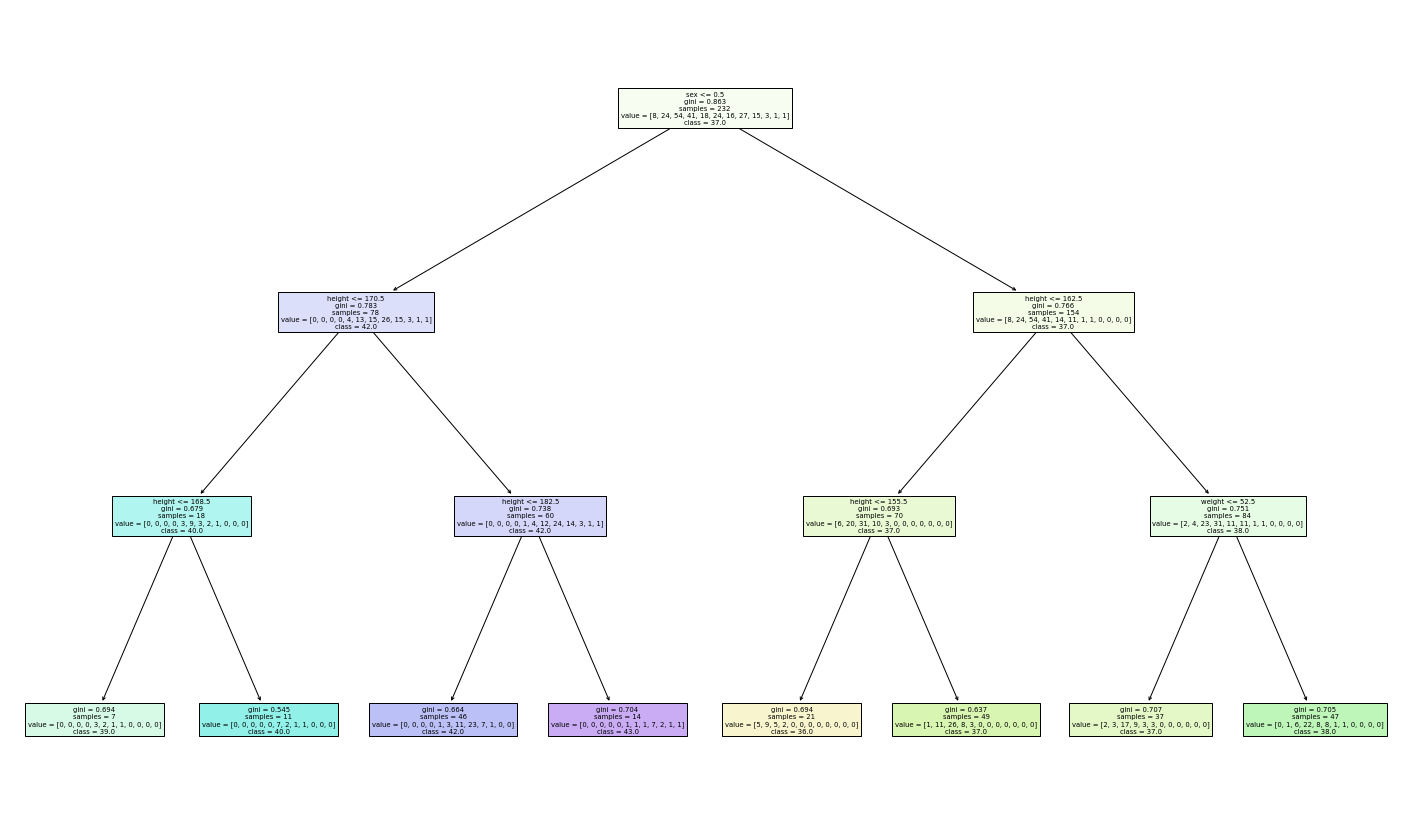

In [71]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[str(i) for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\shoe_size_tree_max_depth_3_without_age_feature.pdf', format='pdf', bbox_inches = "tight")

In [72]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [73]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [74]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', DecisionTreeClassifier())])

In [75]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [76]:
rand_search.fit(X_train_wa, y_train_wa)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=4;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=4;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=4;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=4;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=4;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_de

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=16;, score

[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=13;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=13;, score=0.217 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=18;, score=0.

[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_sample

[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.3

[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=21;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_sample

[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=20;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=21, model__min

[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=36;, score

[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=33;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=14;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=14;, sc

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.391 total 

[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=8;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=8;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=8;

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.3

[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.348 tota

[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=39;, score=0.375 

[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=35;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=39;, sco

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=3;, sc

[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=26;, s

[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=31;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=9;, score=0.417 tot

[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=8;, score=0.609 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=8;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=8;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split

[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.3

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=21;, score=0.348 tot

[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=23;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=23;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=30;, score=0.333

[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split

[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=32;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_sp

[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.217 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=4;, sco

[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=14;, score=0.609 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_s

[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=21;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=21;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=21;, score=

[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=35;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=5

[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=9;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=9;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=9;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=9;

[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.458 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samp

[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=5;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=5;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=5;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=5;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=5;, 

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=12;, score=0.3

[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=11, model__min_samples

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.348 tota

[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=8;, score=0.391 tota

[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split

[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=

[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_sample

[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=10;, score=0.478 tota

[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=20, model__min_samples

[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split

[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.304 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_sample

[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=11;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=17;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=17;, score=

[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.217 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=15;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=15;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_sample

[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=37;,

[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_spli

[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=26;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=26;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=26;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=1

[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=14;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=28;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=28;, score=0.458 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=28;, sco

[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=28;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=25;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=25;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=25;, score=0.4

[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=38;, score=0.217 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=39;, score=0.

[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=30;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.500 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.417 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=14, model__min_sample

[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=37;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.

[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.565 total ti

[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=9;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=22;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=22;, score=0.458 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_sample

[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=7;, score=0.500 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=7;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=7;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split

[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=37;, score=0.3

[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.217 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.478 total time=

[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=29;, sc

[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=24;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=24;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=24;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=24;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples

[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.391 tota

[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=35;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=35;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=35;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=

[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.174 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=3;, sc

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.375 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.348 tota

[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.333 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.348 tota

[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=34;, score=0.3

[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.4

[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.522 tota

[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=19;, score=0.435 to

[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.217 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=21;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=21;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=21;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_s

[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=39;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=39;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples

[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=17;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=17;, score=0.261 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=

[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_sample

[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.5

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=33;, score=0.478 tota

[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=3;, score=0.47

[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=39;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split

[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.500 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.292 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=1

[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=23;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=23;, score=0.417 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=23

[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=22, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=22, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=22, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=22, model__min_samples_split=13;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=30;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=30;, score=0.458 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=30;,

[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.304 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.348 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_spli

[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=36;, score=0.417 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=36;, score=0.458 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=36;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples

[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=30;, score=0.458 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=30;, score=0.250 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=30;, score=0.478 tot

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=2;, score=0.261 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=25;, score=0.375 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=25;, score=0.333 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=21, model__min_samples_split=25;, score

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__criterion': ['gini',
                   

In [77]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
121       0.007738      0.000449         0.003957        0.000407   
287       0.008091      0.001240         0.004140        0.000628   
417       0.007651      0.000663         0.003706        0.000456   
154       0.007994      0.001410         0.004023        0.000253   
65        0.007416      0.000376         0.003941        0.000353   

    param_model__min_samples_split param_model__min_samples_leaf  \
121                             18                            12   
287                             25                            12   
417                             15                            12   
154                             14                            11   
65                               4                            11   

    param_model__max_depth param_model__criterion  \
121                      6                entropy   
287                     10                entropy   
417                      7                entropy   
154                     11                entropy   
65                       5                entropy   

                                                params  split0_test_score  \
121  {'model__min_samples_split': 18, 'model__min_s...                0.5   
287  {'model__min_samples_split': 25, 'model__min_s...                0.5   
417  {'model__min_samples_split': 15, 'model__min_s...                0.5   
154  {'model__min_samples_split': 14, 'model__min_s...                0.5   
65   {'model__min_samples_split': 4, 'model__min_sa...                0.5   

     ...  split3_test_score  split4_test_score  split5_test_score  \
121  ...           0.391304           0.608696           0.608696   
287  ...           0.391304           0.608696           0.608696   
417  ...           0.391304           0.608696           0.608696   
154  ...           0.434783           0.565217           0.608696   
65   ...           0.434783           0.565217           0.608696   

     split6_test_score  split7_test_score  split8_test_score  \
121           0.304348           0.347826           0.521739   
287           0.304348           0.347826           0.521739   
417           0.304348           0.347826           0.521739   
154           0.304348           0.347826           0.521739   
65            0.304348           0.347826           0.521739   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
121           0.304348         0.439674        0.109142                1  
287           0.304348         0.439674        0.109142                1  
417           0.304348         0.439674        0.109142                1  
154           0.347826         0.435507        0.101679                4  
65            0.347826         0.435507        0.101679                4  

[5 rows x 22 columns]

In [78]:
best_tree_without_age_feature = rand_search.best_estimator_

In [79]:
best_tree_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=18))])

In [80]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree_without_age_feature.named_steps.model, 
          filled=True, 
          class_names=[str(i) for i in best_tree_without_age_feature.named_steps.model.classes_],
          feature_names=['male', 'female', 'height', 'weight'])
plt.savefig(r'..\plots\best_tree_without_age_feature.pdf', format='pdf', bbox_inches = "tight")

In [81]:
y_pred = best_tree_without_age_feature.predict(X_test_wa)
y_pred

array([36., 37., 40., 41., 40., 42., 40., 42., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 38., 40., 37., 37., 37., 36., 43., 37., 37.,
       42., 40., 38., 42., 40., 37., 38., 42., 37., 37., 38., 38., 36.,
       37., 37., 36., 38., 40., 36., 38., 38., 37., 38., 38., 37., 36.,
       38., 42., 41., 36., 42., 43.])

In [82]:
y_test_wa.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [83]:
accuracy_score(y_test_wa, y_pred)

0.41379310344827586

In [84]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

In [85]:
best_tree_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=18))])

In [86]:
with open('..\models\shoe_size_pred_models\decision_tree_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_tree_without_age_feature, f)

Decision Tree Classifier without age feature shows better results than with the feature. 
<br>
With Age Feature = 42.4% accuracy score, std = 7% 
<br>
Without Age Feature = 43.3% accuracy score, std = 7%

# SVM

In [87]:
from sklearn.svm import SVC

In [88]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [89]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', SVC())])

In [90]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [91]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [92]:
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 4/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=17,

[CV 4/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 1/10] END model

[CV 5/10] END model__C=45, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=85,

[CV 7/10] END model__C=81, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=23, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=23, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=23, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=23, mod

[CV 9/10] END model__C=43, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=17, m

[CV 2/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model_

[CV 1/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=0

[CV 3/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=83,

[CV 3/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model

[CV 6/10] END model__C=23, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=23, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=55, mod

[CV 6/10] END model__C=29, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__

[CV 8/10] END model__C=39, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=63, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=63, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=63, mo

[CV 10/10] END model__C=83, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, 

[CV 2/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=95, model__

[CV 3/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=37,

[CV 5/10] END model__C=51, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=51, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model_

[CV 5/10] END model__C=89, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=89, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model_

[CV 8/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=15, model__co

[CV 1/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=75, 

[CV 2/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=8

[CV 4/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=27, model_

[CV 6/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=45, model_

[CV 8/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=97, mod

[CV 8/10] END model__C=45, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=11, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 2/10] END model__C=11, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=11, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=11, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=11,

[CV 9/10] END model__C=15, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=29, m

[CV 8/10] END model__C=23, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=77, mod

[CV 10/10] END model__C=31, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=89, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=89, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=89, model

[CV 10/10] END model__C=41, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=69

[CV 2/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=49, model__

[CV 2/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model_

[CV 2/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=8

[CV 3/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=71, model_

[CV 4/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=37,

[CV 8/10] END model__C=21, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=0,

[CV 1/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=8

[CV 3/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=1, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=1, model__

[CV 5/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=51, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=51, model__

[CV 5/10] END model__C=77, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=95,

[CV 6/10] END model__C=17, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=17, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=17, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=17, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=17, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=37, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=37, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=

[CV 6/10] END model__C=11, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=11, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=11, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=11, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=79, mode

[CV 7/10] END model__C=1, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=1, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=1, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=1, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=43, model__

[CV 9/10] END model__C=41, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=1, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=1, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=1, model__

[CV 1/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=37, 

[CV 1/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=43, 

[CV 3/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model

[CV 2/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=13, 

[CV 3/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=95,

[CV 5/10] END model__C=77, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=79, model

[CV 5/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=79, 

[CV 5/10] END model__C=83, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=77,

[CV 8/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=17, mo

[CV 8/10] END model__C=69, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=29,

[CV 10/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=5, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=5, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=5, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=6, mo

[CV 3/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=89,

[CV 4/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model

[CV 7/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__

[CV 10/10] END model__C=79, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=93, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=93, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C

[CV 10/10] END model__C=35, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=81, 

[CV 3/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=13, model_

[CV 5/10] END model__C=61, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=3, m

[CV 7/10] END model__C=85, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=25, mo

[CV 9/10] END model__C=37, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=37, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=97, model_

[CV 9/10] END model__C=61, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=57, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=57, mode

[CV 9/10] END model__C=79, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=87, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=87, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=87, model_

[CV 10/10] END model__C=93, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=43, model_

[CV 2/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=4

[CV 4/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=77,

[CV 5/10] END model__C=41, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=55, 

[CV 6/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=73, mode

[CV 8/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=1, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=1, model__coef

[CV 1/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=83, model__

[CV 1/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=81, 

[CV 4/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=89, model_

[CV 7/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=67, mod

[CV 9/10] END model__C=53, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=17, mode

[CV 9/10] END model__C=49, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=21, model__c

[CV 1/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=12

[CV 4/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=83,

[CV 7/10] END model__C=57, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=7, model__coe

[CV 9/10] END model__C=17, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=17, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=99, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=99, mode

[CV 10/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=89, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=89, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=89, model_

[CV 1/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=79, model__

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9

In [93]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
290       0.044328      0.005628         0.005176        0.000308   
373       0.045406      0.002962         0.005117        0.000458   
72        0.044077      0.006241         0.005246        0.000388   
266       0.041185      0.005198         0.005133        0.000374   
198       0.048283      0.007396         0.007686        0.002323   

    param_model__probability param_model__kernel param_model__gamma  \
290                     True                 rbf               0.15   
373                     True                 rbf               0.15   
72                      True                 rbf               0.15   
266                     True                 rbf               0.05   
198                     True                 rbf               0.05   

    param_model__coef0 param_model__C  \
290                 12              9   
373                  4              9   
72                   6              9   
266                 14              5   
198                 12              5   

                                                params  ...  \
290  {'model__probability': True, 'model__kernel': ...  ...   
373  {'model__probability': True, 'model__kernel': ...  ...   
72   {'model__probability': True, 'model__kernel': ...  ...   
266  {'model__probability': True, 'model__kernel': ...  ...   
198  {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
290           0.434783           0.434783           0.652174   
373           0.434783           0.434783           0.652174   
72            0.434783           0.434783           0.652174   
266           0.434783           0.434783           0.565217   
198           0.434783           0.434783           0.565217   

     split6_test_score  split7_test_score  split8_test_score  \
290           0.347826           0.304348           0.478261   
373           0.347826           0.304348           0.478261   
72            0.347826           0.304348           0.478261   
266           0.391304           0.391304           0.434783   
198           0.391304           0.391304           0.434783   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
290           0.260870         0.405797        0.110234                1  
373           0.260870         0.405797        0.110234                1  
72            0.260870         0.405797        0.110234                1  
266           0.217391         0.401630        0.097672                4  
198           0.217391         0.401630        0.097672                4  

[5 rows x 23 columns]

In [94]:
best_svc = rand_search.best_estimator_

In [95]:
best_svc.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', SVC(C=9, coef0=6, gamma=0.15, probability=True))])

In [96]:
y_pred = best_svc.predict(X_test)
y_pred

array([36., 37., 38., 41., 41., 42., 37., 43., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 40., 38., 38., 37., 37., 36., 42., 38., 37.,
       42., 42., 38., 42., 38., 37., 38., 42., 37., 38., 38., 38., 36.,
       37., 37., 36., 38., 37., 37., 38., 38., 37., 38., 38., 37., 36.,
       38., 42., 41., 36., 42., 43.])

In [97]:
y_test.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [98]:
accuracy_score(y_test, y_pred)

0.46551724137931033

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

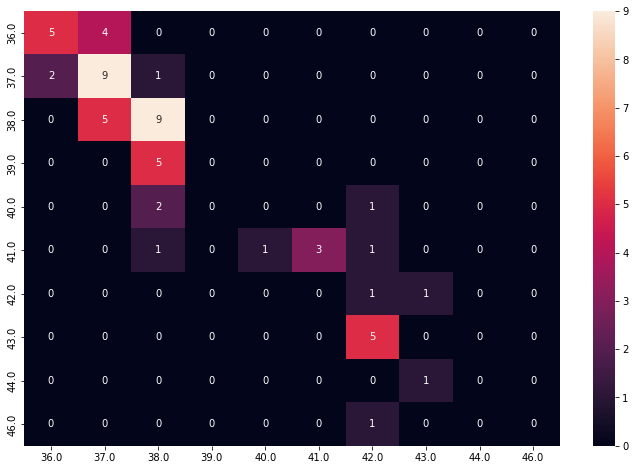

In [99]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [100]:
best_svc.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', SVC(C=9, coef0=6, gamma=0.15, probability=True))])

In [101]:
with open('..\models\shoe_size_pred_models\svc.pkl', 'wb') as f:
    pickle.dump(best_svc, f)

Without Age feature

In [102]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [103]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', SVC())])

In [104]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25, 1, 10],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [105]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [106]:
rand_search.fit(X_train_wa, y_train_wa)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 5/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 1/10] END model__C=87, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=87, model__

[CV 8/10] END model__C=37, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=37, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=12,

[CV 10/10] END model__C=49, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=89, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=89, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=89,

[CV 2/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=1

[CV 4/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model

[CV 5/10] END model__C=65, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=

[CV 7/10] END model__C=7, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=79, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=0, 

[CV 8/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=53, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=53, mod

[CV 1/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 3/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=8

[CV 2/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=14

[CV 5/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 7/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=69, 

[CV 6/10] END model__C=97, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0

[CV 6/10] END model__C=99, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=1

[CV 7/10] END model__C=87, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=63, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=63, mo

[CV 7/10] END model__C=93, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=45,

[CV 10/10] END model__C=29, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=47, model_

[CV 3/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=93, model_

[CV 5/10] END model__C=21, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=8, mod

[CV 8/10] END model__C=29, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=73, model_

[CV 8/10] END model__C=65, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=55, mod

[CV 1/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=18, model

[CV 3/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=83, model_

[CV 3/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=77, model_

[CV 5/10] END model__C=51, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=51, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=59, mode

[CV 7/10] END model__C=11, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=11, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=11, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=67, mo

[CV 8/10] END model__C=69, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model_

[CV 9/10] END model__C=23, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=

[CV 9/10] END model__C=27, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0

[CV 10/10] END model__C=93, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=73, model_

[CV 2/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=1

[CV 4/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=4, mode

[CV 6/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=

[CV 6/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=67, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=43, mod

[CV 9/10] END model__C=51, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=19, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=19, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=19, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=19, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=19,

[CV 2/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.130 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=14, model

[CV 3/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=91, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=91,

[CV 3/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=1, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=1, model__coef0=16, mode

[CV 6/10] END model__C=95, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=95, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 2/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=5, model__co

[CV 10/10] END model__C=23, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__

[CV 4/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=27, model_

[CV 7/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=2

[CV 8/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=81,

[CV 10/10] END model__C=67, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=8, m

[CV 4/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=67, model_

[CV 7/10] END model__C=77, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=91, model_

[CV 9/10] END model__C=5, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=99, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=2, model

[CV 1/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=18, mode

[CV 1/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=77, model__

[CV 1/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=85, 

[CV 4/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=

[CV 5/10] END model__C=69, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=69, model__coe

[CV 6/10] END model__C=29, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=31, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=31, model__coef

[CV 6/10] END model__C=89, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=89, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=19, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=19, mode

[CV 7/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=

[CV 8/10] END model__C=49, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=0, mod

[CV 8/10] END model__C=59, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=59, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=0, mo

[CV 9/10] END model__C=39, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=13, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=13, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=13, model__coe

[CV 10/10] END model__C=95, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=3, model__

[CV 1/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=57, 

[CV 2/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=31, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=31, 

[CV 3/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=59, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=6, mode

[CV 7/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=33, model__

[CV 7/10] END model__C=73, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.375 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=0

[CV 9/10] END model__C=79, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=12, mod

[CV 2/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=85, 

[CV 2/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.250 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=0, model

[CV 5/10] END model__C=33, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=7, mod

[CV 8/10] END model__C=57, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=57, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=57, model__co

[CV 8/10] END model__C=77, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=9, mode

[CV 10/10] END model__C=29, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=8, model__ga

[CV 1/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=8, model

[CV 4/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=16, mod

[CV 4/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=0, mode

[CV 6/10] END model__C=83, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=7, model__c

[CV 8/10] END model__C=47, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=93, model__c

[CV 1/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.458 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=91, model__coef0=16, mode

[CV 4/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=1

[CV 6/10] END model__C=97, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=2

[CV 7/10] END model__C=19, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=19, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=19, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 10/10] END model__C=19, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=25, model_

[CV 9/10] END model__C=71, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.417 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.292 total time=   0.0s
[CV 3/10] END model__C=79, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=79, model

[CV 1/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.333 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.174 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=27, model__coef0=4, model

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25,

In [107]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
163       0.042978      0.003235         0.005526        0.000925   
302       0.045603      0.005376         0.005286        0.000898   
419       0.045162      0.003860         0.005186        0.000399   
455       0.043294      0.003511         0.005001        0.000775   
206       0.041573      0.007001         0.005996        0.001234   

    param_model__probability param_model__kernel param_model__gamma  \
163                     True                 rbf               0.05   
302                     True                 rbf               0.05   
419                     True                 rbf               0.05   
455                     True                 rbf               0.05   
206                     True                 rbf               0.25   

    param_model__coef0 param_model__C  \
163                  6             75   
302                  4             77   
419                 14             77   
455                 14             75   
206                  6              5   

                                                params  ...  \
163  {'model__probability': True, 'model__kernel': ...  ...   
302  {'model__probability': True, 'model__kernel': ...  ...   
419  {'model__probability': True, 'model__kernel': ...  ...   
455  {'model__probability': True, 'model__kernel': ...  ...   
206  {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
163           0.434783           0.434783           0.608696   
302           0.434783           0.434783           0.608696   
419           0.434783           0.434783           0.608696   
455           0.434783           0.434783           0.608696   
206           0.434783           0.478261           0.608696   

     split6_test_score  split7_test_score  split8_test_score  \
163           0.391304           0.391304           0.521739   
302           0.391304           0.391304           0.521739   
419           0.391304           0.391304           0.521739   
455           0.391304           0.391304           0.521739   
206           0.347826           0.347826           0.565217   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
163           0.347826         0.435870        0.076273                1  
302           0.347826         0.435870        0.076273                1  
419           0.347826         0.435870        0.076273                1  
455           0.347826         0.435870        0.076273                1  
206           0.347826         0.431522        0.090746                5  

[5 rows x 23 columns]

In [108]:
best_svc_without_age_feature = rand_search.best_estimator_

In [109]:
best_svc_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', SVC(C=75, coef0=6, gamma=0.05, probability=True))])

In [110]:
y_pred = best_svc_without_age_feature.predict(X_test_wa)
y_pred

array([36., 37., 38., 41., 41., 42., 37., 42., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 40., 38., 37., 37., 37., 36., 43., 38., 37.,
       42., 40., 38., 42., 38., 37., 38., 42., 37., 38., 38., 38., 36.,
       37., 37., 36., 38., 37., 37., 38., 38., 37., 38., 38., 37., 36.,
       38., 42., 41., 36., 42., 43.])

In [111]:
y_test_wa.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [112]:
accuracy_score(y_test_wa, y_pred)

0.46551724137931033

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

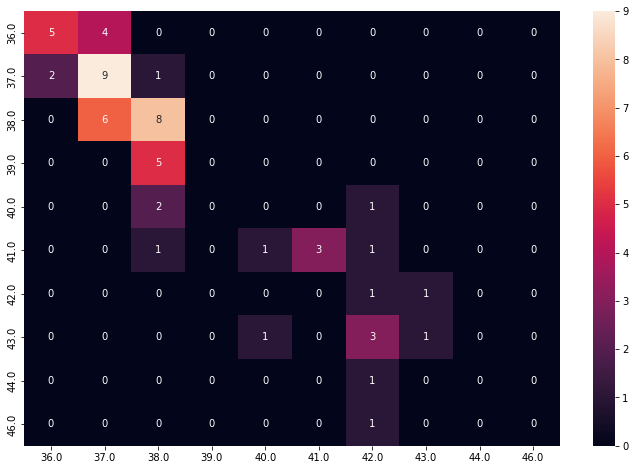

In [113]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [114]:
best_svc_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', SVC(C=75, coef0=6, gamma=0.05, probability=True))])

In [115]:
with open('..\models\shoe_size_pred_models\svc_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_svc_without_age_feature, f)

SVM Classifier without age feature shows better results than with the feature. 
<br>
With Age Feature = 44.1% accuracy score, std = 7% 
<br>
Without Age Feature = 46.1% accuracy score, std = 8%

# K Neighbors

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [118]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', KNeighborsClassifier())])

In [119]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [120]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [121]:
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.375 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.417 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.217 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.130 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 1/10] END mo

[CV 10/10] END model__n_neighbors=5, model__weights=distance;, score=0.348 total time=   0.0s
[CV 1/10] END model__n_neighbors=6, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 2/10] END model__n_neighbors=6, model__weights=uniform;, score=0.250 total time=   0.0s
[CV 3/10] END model__n_neighbors=6, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=6, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=6, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=6, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=6, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=6, model__weights=uniform;, score=0.217 total time=   0.0s
[CV 9/10] END model__n_neighbors=6, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=6, model__weights=uniform;, score=0.304 tota

[CV 10/10] END model__n_neighbors=10, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 1/10] END model__n_neighbors=10, model__weights=distance;, score=0.333 total time=   0.0s
[CV 2/10] END model__n_neighbors=10, model__weights=distance;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=10, model__weights=distance;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=10, model__weights=distance;, score=0.522 total time=   0.0s
[CV 7/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=10, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=10, model__weights=distance;, score=0.304 total time=   0.0s
[CV 10/10] END model__n_neighbors=10, model__weights=distanc

[CV 9/10] END model__n_neighbors=14, model__weights=distance;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=14, model__weights=distance;, score=0.435 total time=   0.0s
[CV 1/10] END model__n_neighbors=15, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 2/10] END model__n_neighbors=15, model__weights=uniform;, score=0.250 total time=   0.0s
[CV 3/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=15, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=15, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=15, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=15, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=15, model__weights=uniform;, score

[CV 4/10] END model__n_neighbors=19, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=19, model__weights=distance;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=19, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=19, model__weights=distance;, score=0.348 total time=   0.0s
[CV 8/10] END model__n_neighbors=19, model__weights=distance;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=19, model__weights=distance;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=19, model__weights=distance;, score=0.391 total time=   0.0s
[CV 1/10] END model__n_neighbors=20, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 2/10] END model__n_neighbors=20, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 3/10] END model__n_neighbors=20, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=20, model__weights=uniform;, 

[CV 6/10] END model__n_neighbors=24, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=24, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=24, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=24, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=24, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 1/10] END model__n_neighbors=24, model__weights=distance;, score=0.333 total time=   0.0s
[CV 2/10] END model__n_neighbors=24, model__weights=distance;, score=0.333 total time=   0.0s
[CV 3/10] END model__n_neighbors=24, model__weights=distance;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=24, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=24, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=24, model__weights=distance;, s

[CV 9/10] END model__n_neighbors=28, model__weights=distance;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=28, model__weights=distance;, score=0.348 total time=   0.0s
[CV 1/10] END model__n_neighbors=29, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 2/10] END model__n_neighbors=29, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=29, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=29, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=29, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=29, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=29, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=29, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=29, model__weights=uniform;, score

[CV 6/10] END model__n_neighbors=33, model__weights=distance;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=33, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=33, model__weights=distance;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=33, model__weights=distance;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=33, model__weights=distance;, score=0.304 total time=   0.0s
[CV 1/10] END model__n_neighbors=34, model__weights=uniform;, score=0.250 total time=   0.0s
[CV 2/10] END model__n_neighbors=34, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=34, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=34, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=34, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=34, model__weights=uniform;, sc

[CV 10/10] END model__n_neighbors=38, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 1/10] END model__n_neighbors=38, model__weights=distance;, score=0.250 total time=   0.0s
[CV 2/10] END model__n_neighbors=38, model__weights=distance;, score=0.417 total time=   0.0s
[CV 3/10] END model__n_neighbors=38, model__weights=distance;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=38, model__weights=distance;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=38, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=38, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=38, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=38, model__weights=distance;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=38, model__weights=distance;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=38, model__weights=distanc

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
    

In [122]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
46       0.010974      0.001538         0.008301        0.001351   
38       0.008579      0.001243         0.006478        0.001166   
48       0.009752      0.001731         0.008385        0.001315   
50       0.010072      0.002376         0.008065        0.002353   
30       0.010953      0.001646         0.008077        0.001253   

   param_model__weights param_model__n_neighbors  \
46              uniform                       24   
38              uniform                       20   
48              uniform                       25   
50              uniform                       26   
30              uniform                       16   

                                               params  split0_test_score  \
46  {'model__weights': 'uniform', 'model__n_neighb...           0.333333   
38  {'model__weights': 'uniform', 'model__n_neighb...           0.291667   
48  {'model__weights': 'uniform', 'model__n_neighb...           0.291667   
50  {'model__weights': 'uniform', 'model__n_neighb...           0.291667   
30  {'model__weights': 'uniform', 'model__n_neighb...           0.333333   

    split1_test_score  split2_test_score  split3_test_score  \
46           0.250000           0.521739           0.434783   
38           0.333333           0.478261           0.391304   
48           0.291667           0.478261           0.391304   
50           0.291667           0.521739           0.391304   
30           0.375000           0.478261           0.391304   

    split4_test_score  split5_test_score  split6_test_score  \
46           0.521739           0.478261           0.391304   
38           0.478261           0.565217           0.347826   
48           0.521739           0.608696           0.347826   
50           0.478261           0.565217           0.347826   
30           0.478261           0.434783           0.347826   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
46           0.347826           0.478261           0.347826         0.410507   
38           0.304348           0.521739           0.391304         0.410326   
48           0.304348           0.434783           0.391304         0.406159   
50           0.260870           0.478261           0.391304         0.401812   
30           0.304348           0.478261           0.391304         0.401268   

    std_test_score  rank_test_score  
46        0.086290                1  
38        0.090279                2  
48        0.100411                3  
50        0.100018                4  
30        0.060548                5

In [123]:
best_kneighbors = rand_search.best_estimator_

In [124]:
best_kneighbors.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=24))])

In [125]:
y_pred = best_kneighbors.predict(X_test)
y_pred

array([37., 37., 37., 41., 41., 42., 37., 42., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 38., 37., 38., 37., 37., 37., 42., 38., 37.,
       42., 42., 38., 42., 37., 37., 38., 42., 37., 38., 38., 38., 37.,
       37., 37., 36., 38., 37., 37., 38., 38., 37., 38., 37., 37., 38.,
       38., 42., 41., 36., 42., 43.])

In [126]:
y_test.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [127]:
accuracy_score(y_test, y_pred)

0.3793103448275862

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

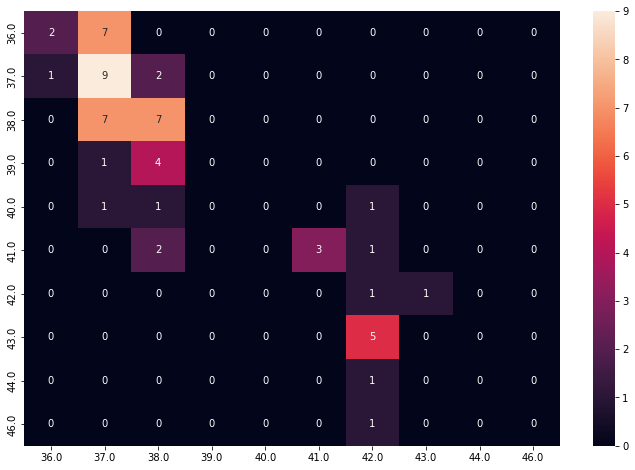

In [128]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [129]:
best_kneighbors.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=24))])

In [130]:
with open('..\models\shoe_size_pred_models\kneighbors_classifier.pkl', 'wb') as f:
    pickle.dump(best_kneighbors, f)

Without Age feature

In [131]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [132]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', KNeighborsClassifier())])

In [133]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [134]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [135]:
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.217 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.217 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 1/10] END mo

[CV 10/10] END model__n_neighbors=5, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 1/10] END model__n_neighbors=5, model__weights=distance;, score=0.417 total time=   0.0s
[CV 2/10] END model__n_neighbors=5, model__weights=distance;, score=0.250 total time=   0.0s
[CV 3/10] END model__n_neighbors=5, model__weights=distance;, score=0.217 total time=   0.0s
[CV 4/10] END model__n_neighbors=5, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=5, model__weights=distance;, score=0.217 total time=   0.0s
[CV 6/10] END model__n_neighbors=5, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=5, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=5, model__weights=distance;, score=0.261 total time=   0.0s
[CV 9/10] END model__n_neighbors=5, model__weights=distance;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=5, model__weights=distance;, score=0

[CV 8/10] END model__n_neighbors=10, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=10, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=10, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 1/10] END model__n_neighbors=10, model__weights=distance;, score=0.375 total time=   0.0s
[CV 2/10] END model__n_neighbors=10, model__weights=distance;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=10, model__weights=distance;, score=0.304 total time=   0.0s
[CV 4/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=10, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=10, model__weights=distance;,

[CV 7/10] END model__n_neighbors=14, model__weights=distance;, score=0.348 total time=   0.0s
[CV 8/10] END model__n_neighbors=14, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=14, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=14, model__weights=distance;, score=0.348 total time=   0.0s
[CV 1/10] END model__n_neighbors=15, model__weights=uniform;, score=0.375 total time=   0.0s
[CV 2/10] END model__n_neighbors=15, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 3/10] END model__n_neighbors=15, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=15, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 6/10] END model__n_neighbors=15, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=15, model__weights=uniform;, sco

[CV 7/10] END model__n_neighbors=19, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=19, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=19, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 10/10] END model__n_neighbors=19, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 1/10] END model__n_neighbors=19, model__weights=distance;, score=0.458 total time=   0.0s
[CV 2/10] END model__n_neighbors=19, model__weights=distance;, score=0.250 total time=   0.0s
[CV 3/10] END model__n_neighbors=19, model__weights=distance;, score=0.304 total time=   0.0s
[CV 4/10] END model__n_neighbors=19, model__weights=distance;, score=0.522 total time=   0.0s
[CV 5/10] END model__n_neighbors=19, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=19, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=19, model__weights=distance;, 

[CV 7/10] END model__n_neighbors=23, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=23, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=23, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=23, model__weights=distance;, score=0.391 total time=   0.0s
[CV 1/10] END model__n_neighbors=24, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 2/10] END model__n_neighbors=24, model__weights=uniform;, score=0.333 total time=   0.0s
[CV 3/10] END model__n_neighbors=24, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=24, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=24, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 6/10] END model__n_neighbors=24, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=24, model__weights=uniform;, sco

[CV 1/10] END model__n_neighbors=28, model__weights=distance;, score=0.417 total time=   0.0s
[CV 2/10] END model__n_neighbors=28, model__weights=distance;, score=0.250 total time=   0.0s
[CV 3/10] END model__n_neighbors=28, model__weights=distance;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=28, model__weights=distance;, score=0.348 total time=   0.0s
[CV 8/10] END model__n_neighbors=28, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=28, model__weights=distance;, score=0.348 total time=   0.0s
[CV 1/10] END model__n_neighbors=29, model__weights=uniform

[CV 1/10] END model__n_neighbors=33, model__weights=uniform;, score=0.417 total time=   0.0s
[CV 2/10] END model__n_neighbors=33, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=33, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=33, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=33, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=33, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 7/10] END model__n_neighbors=33, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 8/10] END model__n_neighbors=33, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 9/10] END model__n_neighbors=33, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=33, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 1/10] END model__n_neighbors=33, model__weights=distance;, score=

[CV 3/10] END model__n_neighbors=37, model__weights=distance;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=37, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=37, model__weights=distance;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=37, model__weights=distance;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=37, model__weights=distance;, score=0.304 total time=   0.0s
[CV 8/10] END model__n_neighbors=37, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=37, model__weights=distance;, score=0.522 total time=   0.0s
[CV 10/10] END model__n_neighbors=37, model__weights=distance;, score=0.304 total time=   0.0s
[CV 1/10] END model__n_neighbors=38, model__weights=uniform;, score=0.375 total time=   0.0s
[CV 2/10] END model__n_neighbors=38, model__weights=uniform;, score=0.292 total time=   0.0s
[CV 3/10] END model__n_neighbors=38, model__weights=uniform;,

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__n_neighbors': [1, 2, 3, 4, 5,
            

In [136]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.012070      0.001752         0.009435        0.002007   
36       0.014313      0.001750         0.010552        0.001450   
28       0.012179      0.002033         0.009395        0.001613   
70       0.008412      0.001008         0.005756        0.000595   
50       0.012938      0.001519         0.010311        0.001762   

   param_model__weights param_model__n_neighbors  \
30              uniform                       16   
36              uniform                       19   
28              uniform                       15   
70              uniform                       36   
50              uniform                       26   

                                               params  split0_test_score  \
30  {'model__weights': 'uniform', 'model__n_neighb...           0.375000   
36  {'model__weights': 'uniform', 'model__n_neighb...           0.375000   
28  {'model__weights': 'uniform', 'model__n_neighb...           0.375000   
70  {'model__weights': 'uniform', 'model__n_neighb...           0.375000   
50  {'model__weights': 'uniform', 'model__n_neighb...           0.416667   

    split1_test_score  split2_test_score  split3_test_score  \
30           0.333333           0.391304           0.434783   
36           0.416667           0.478261           0.434783   
28           0.333333           0.391304           0.434783   
70           0.333333           0.521739           0.391304   
50           0.333333           0.478261           0.391304   

    split4_test_score  split5_test_score  split6_test_score  \
30           0.565217           0.478261           0.434783   
36           0.521739           0.434783           0.391304   
28           0.565217           0.478261           0.434783   
70           0.521739           0.478261           0.391304   
50           0.565217           0.478261           0.347826   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
30           0.347826           0.521739           0.391304         0.427355   
36           0.304348           0.521739           0.391304         0.426993   
28           0.347826           0.478261           0.391304         0.423007   
70           0.304348           0.478261           0.391304         0.418659   
50           0.304348           0.521739           0.347826         0.418478   

    std_test_score  rank_test_score  
30        0.071499                1  
36        0.064111                2  
28        0.066795                3  
70        0.072701                4  
50        0.083871                5

In [137]:
best_kneighbors_without_age_feature = rand_search.best_estimator_

In [138]:
best_kneighbors_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=16))])

In [139]:
y_pred = best_kneighbors_without_age_feature.predict(X_test_wa)
y_pred

array([36., 37., 38., 41., 41., 42., 37., 43., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 38., 38., 38., 37., 37., 36., 42., 38., 37.,
       42., 42., 38., 42., 38., 37., 38., 42., 37., 38., 38., 38., 36.,
       37., 37., 36., 38., 37., 36., 38., 38., 37., 38., 38., 37., 38.,
       38., 42., 41., 36., 42., 43.])

In [140]:
y_test_wa.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [141]:
accuracy_score(y_test_wa, y_pred)

0.4827586206896552

In [142]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

In [143]:
best_kneighbors_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=16))])

In [144]:
with open('..\models\shoe_size_pred_models\kneighbors_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_kneighbors_without_age_feature, f)

KNeighbors Classifier without age feature shows better results than with the feature. 
<br>
With Age Feature = 43.7% accuracy score, std = 9% 
<br>
Without Age Feature = 44.6% accuracy score, std = 8%

# Voting Classifier

In [145]:
from sklearn.ensemble import VotingClassifier

In [146]:
import itertools

def all_sub_arrays(xs):
    n = len(xs)
    indices = list(range(n+1))
    for i,j in itertools.combinations(indices,2):
        yield xs[i:j]

In [147]:
all_models = [('log_reg', best_log_reg.named_steps.model), ('dec_tree', best_tree.named_steps.model), 
              ('svm', best_svc.named_steps.model), ('kneighbors', best_kneighbors.named_steps.model)]

In [148]:
all_model_combs = list(all_sub_arrays(all_models))

In [149]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [150]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', VotingClassifier(estimators=[]))])

In [151]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [152]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [153]:
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.292 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.250 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.304 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, sc

[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700)), ('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700)), ('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700)), ('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('sv

[CV 2/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.292 total time=   0.0s
[CV 3/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 4/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.435 total time=   

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=

In [154]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6       0.045146      0.003685         0.006648        0.000575   
1       0.068960      0.007509         0.004763        0.000592   
4       0.009418      0.001401         0.004334        0.000532   
2       0.102233      0.006296         0.006145        0.001665   
3       0.106040      0.009498         0.007710        0.001404   

  param_model__voting                            param_model__estimators  \
6                soft  [(dec_tree, DecisionTreeClassifier(criterion='...   
1                soft  [(log_reg, LogisticRegression(C=5, max_iter=70...   
4                soft  [(dec_tree, DecisionTreeClassifier(criterion='...   
2                soft  [(log_reg, LogisticRegression(C=5, max_iter=70...   
3                soft  [(log_reg, LogisticRegression(C=5, max_iter=70...   

                                              params  split0_test_score  \
6  {'model__voting': 'soft', 'model__estimators':...           0.500000   
1  {'model__voting': 'soft', 'model__estimators':...           0.500000   
4  {'model__voting': 'soft', 'model__estimators':...           0.500000   
2  {'model__voting': 'soft', 'model__estimators':...           0.458333   
3  {'model__voting': 'soft', 'model__estimators':...           0.458333   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
6           0.291667           0.478261           0.434783           0.565217   
1           0.291667           0.434783           0.391304           0.521739   
4           0.416667           0.478261           0.391304           0.565217   
2           0.333333           0.434783           0.391304           0.521739   
3           0.333333           0.434783           0.434783           0.521739   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
6           0.565217           0.434783           0.434783           0.565217   
1           0.608696           0.434783           0.391304           0.565217   
4           0.608696           0.347826           0.304348           0.521739   
2           0.608696           0.434783           0.434783           0.521739   
3           0.608696           0.434783           0.391304           0.521739   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
6           0.391304         0.466123        0.083507                1  
1           0.434783         0.457428        0.088436                2  
4           0.391304         0.452536        0.093003                3  
2           0.347826         0.448732        0.079826                4  
3           0.347826         0.448732        0.079826                4

In [155]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('dec_tree',
   DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                          min_samples_split=3)),
  ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)),
  ('kneighbors', KNeighborsClassifier(n_neighbors=24))]}

In [156]:
best_voting_cls = rand_search.best_estimator_

In [157]:
best_voting_cls.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=5,
                                                                      min_samples_leaf=12,
                                                                      min_samples_split=3)),
                                              ('svm',
                                               SVC(C=9

In [158]:
y_pred = best_voting_cls.predict(X_test)
y_pred

array([36., 37., 38., 41., 40., 42., 37., 42., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 40., 38., 37., 37., 37., 36., 43., 38., 37.,
       42., 42., 38., 42., 40., 37., 38., 42., 37., 38., 38., 38., 36.,
       37., 37., 36., 40., 38., 37., 38., 38., 37., 38., 38., 37., 36.,
       38., 42., 41., 36., 42., 43.])

In [159]:
y_test.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [160]:
accuracy_score(y_test, y_pred)

0.41379310344827586

In [161]:
x_axis = np.unique(np.concatenate([y_test.values, y_pred]))
x_axis

array([36., 37., 38., 39., 40., 41., 42., 43., 44., 46.])

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

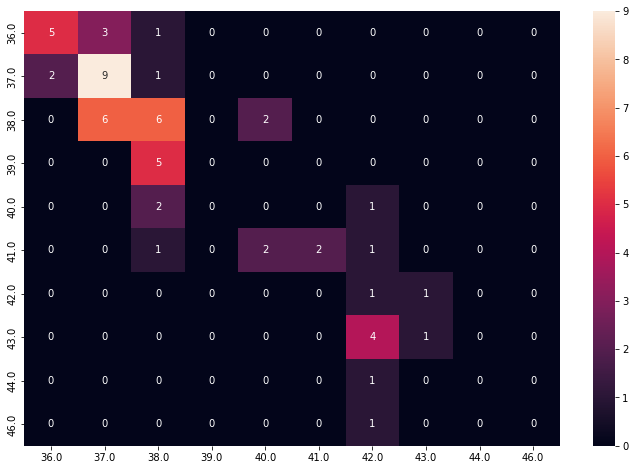

In [162]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [163]:
best_voting_cls.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=5,
                                                                      min_samples_leaf=12,
                                                                      min_samples_split=3)),
                                              ('svm',
                                               SVC(C=9

In [164]:
with open(r'..\models\shoe_size_pred_models\voting_classifier.pkl', 'wb') as f:
    pickle.dump(best_voting_cls, f)

Without Age Feature

In [165]:
all_models_without_age_feature = [('log_reg', best_log_reg_without_age_feature.named_steps.model), 
                                  ('dec_tree', best_tree_without_age_feature.named_steps.model), 
                                  ('svm', best_svc_without_age_feature.named_steps.model),
                                  ('kneighbors', best_kneighbors_without_age_feature.named_steps.model)]

In [166]:
all_model_combs_without_age_feature = list(all_sub_arrays(all_models_without_age_feature))

In [167]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight'])])

In [168]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', VotingClassifier(estimators=[]))])

In [169]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [170]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)

In [171]:
rand_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.417 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.250 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.304 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700))], model__voting=soft;, sc

[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700)), ('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700)), ('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=5, max_iter=700)), ('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('sv

[CV 7/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 8/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 9/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                       min_samples_split=3)), ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=24))], model__voting=soft;, score=0.522 total time=   

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=500,
                   param_distributions=[{'model__estimators': [[('log_reg',
      

In [172]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       0.101837      0.008779         0.006926        0.000541   
1       0.068616      0.009940         0.005032        0.001323   
6       0.042339      0.003451         0.006735        0.000605   
4       0.009065      0.001503         0.004230        0.000356   
2       0.099760      0.006350         0.006251        0.000786   

  param_model__voting                            param_model__estimators  \
3                soft  [(log_reg, LogisticRegression(C=5, max_iter=70...   
1                soft  [(log_reg, LogisticRegression(C=5, max_iter=70...   
6                soft  [(dec_tree, DecisionTreeClassifier(criterion='...   
4                soft  [(dec_tree, DecisionTreeClassifier(criterion='...   
2                soft  [(log_reg, LogisticRegression(C=5, max_iter=70...   

                                              params  split0_test_score  \
3  {'model__voting': 'soft', 'model__estimators':...           0.500000   
1  {'model__voting': 'soft', 'model__estimators':...           0.458333   
6  {'model__voting': 'soft', 'model__estimators':...           0.458333   
4  {'model__voting': 'soft', 'model__estimators':...           0.500000   
2  {'model__voting': 'soft', 'model__estimators':...           0.458333   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
3           0.333333           0.434783           0.434783           0.565217   
1           0.291667           0.434783           0.391304           0.565217   
6           0.291667           0.391304           0.391304           0.565217   
4           0.375000           0.434783           0.391304           0.608696   
2           0.291667           0.434783           0.391304           0.521739   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
3           0.608696           0.391304           0.434783           0.565217   
1           0.608696           0.434783           0.347826           0.608696   
6           0.652174           0.391304           0.434783           0.521739   
4           0.608696           0.304348           0.347826           0.521739   
2           0.608696           0.391304           0.434783           0.521739   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
3           0.304348         0.457246        0.096268                1  
1           0.347826         0.448913        0.106564                2  
6           0.304348         0.440217        0.107359                3  
4           0.304348         0.439674        0.109142                4  
2           0.304348         0.435870        0.093374                5

In [173]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('log_reg', LogisticRegression(C=5, max_iter=700)),
  ('dec_tree',
   DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=12,
                          min_samples_split=3)),
  ('svm', SVC(C=9, coef0=6, gamma=0.15, probability=True)),
  ('kneighbors', KNeighborsClassifier(n_neighbors=24))]}

In [174]:
best_voting_cls_without_age_feature = rand_search.best_estimator_

In [175]:
best_voting_cls_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('log_reg',
                                               LogisticRegression(C=5,
                                                                  max_iter=700)),
                                              ('dec_tree',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=5,
                                                                      min_samples_leaf=12,
                                                

In [176]:
y_pred = best_voting_cls_without_age_feature.predict(X_test_wa)
y_pred

array([36., 37., 38., 41., 40., 42., 37., 42., 36., 37., 42., 37., 38.,
       37., 37., 38., 37., 38., 38., 37., 37., 37., 36., 43., 38., 37.,
       42., 42., 38., 42., 38., 37., 38., 42., 37., 38., 38., 38., 36.,
       37., 37., 36., 38., 37., 37., 38., 38., 37., 38., 38., 37., 36.,
       38., 42., 41., 36., 42., 43.])

In [177]:
y_test_wa.values

array([36., 38., 39., 41., 41., 43., 37., 44., 36., 36., 43., 38., 38.,
       37., 37., 37., 37., 41., 40., 38., 37., 38., 36., 43., 38., 36.,
       46., 43., 40., 41., 38., 38., 41., 43., 37., 38., 39., 38., 36.,
       37., 38., 37., 38., 36., 36., 38., 39., 37., 39., 38., 37., 37.,
       39., 42., 41., 36., 40., 42.])

In [178]:
accuracy_score(y_test_wa, y_pred)

0.4482758620689655

In [179]:
x_axis = np.unique(np.concatenate([y_test_wa.values, y_pred]))
x_axis

array([36., 37., 38., 39., 40., 41., 42., 43., 44., 46.])

[Text(0, 0.5, '36.0'),
 Text(0, 1.5, '37.0'),
 Text(0, 2.5, '38.0'),
 Text(0, 3.5, '39.0'),
 Text(0, 4.5, '40.0'),
 Text(0, 5.5, '41.0'),
 Text(0, 6.5, '42.0'),
 Text(0, 7.5, '43.0'),
 Text(0, 8.5, '44.0'),
 Text(0, 9.5, '46.0')]

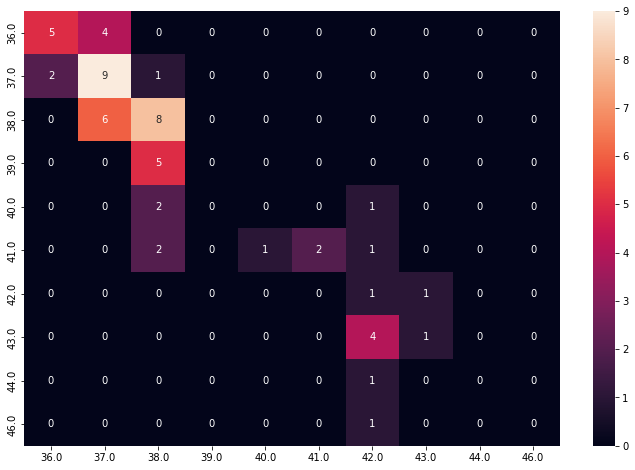

In [180]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [181]:
X_test_wa[y_test_wa == 42], best_voting_cls_without_age_feature.predict(X_test_wa[y_test_wa == 42])

(        sex  height  weight
 255  Արական   178.0    85.0
 175  Արական   185.0    68.0,
 array([42., 43.]))

In [182]:
best_voting_cls_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('log_reg',
                                               LogisticRegression(C=5,
                                                                  max_iter=700)),
                                              ('dec_tree',
                                               DecisionTreeClassifier(criterion='entropy',
                                                                      max_depth=5,
                                                                      min_samples_leaf=12,
                                                

In [183]:
with open(r'..\models\shoe_size_pred_models\voting_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_voting_cls_without_age_feature, f)

Voting Classifier without age feature shows better results than with the feature. 
<br>
With Age Feature = 46.6% accuracy score, std = 8% 
<br>
Without Age Feature = 45.7% accuracy score, std = 9%